# <center>WORD EMBEDDING VÀ ỨNG DỤNG</center>


*Word Embedding là một cách biểu diễn dữ liệu văn bản thành các vector, sao cho những vectors gần giống nhau sẽ biểu thị những từ với ý nghĩa gần giống nhau. Trong bài thực hành ngày hôm nay, chúng ta sẽ cùng làm quen và sử dụng các model Word Embedding có sẵn (pretrained model) để giải quyết các bài toán Machine Learning đơn giản* 

### Nội dung 

1 - Giới thiệu 

2 - Biểu diễn Word Embedding

3 - Sử dụng Pretrained Word Embedding


## 1. Giới thiệu

### a. Pretrained model

Các model Word Embedding được huấn luyện dựa trên tập dữ liệu rất lớn và đa dạng (dữ liệu từ Wikipedia), vì vậy thông thường khi cần sử dụng Word Embedding, ta sẽ sử dụng lại các model đã được huấn luyện sẵn. Một số pretrained model thường được sử dụng:
- <a href = "https://code.google.com/archive/p/word2vec/" > Word2Vec </a>
- <a href = "https://nlp.stanford.edu/projects/glove/" > GLoVe </a>
- [BERT](https://github.com/google-research/bert)

Các thông số cần lưu ý khi lựa chọn pretrained model:
- Kích thước tập từ vựng (vocab)
- Số chiều của vector biểu diễn từ (dimension)

Trong tutorial này, chúng ta sẽ sử dụng word embedding cho tiếng Anh (en) và tiếng Việt (vi) đã được huấn luyện trước bằng mô hình Word2Vec. Cụ thể, các bạn tải 2 mô hình dưới đây và giải nén vào thư mục `./data`:
1. en: https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki-news-300d-1M.vec.zip: cung cấp bởi [fasttext.cc](https://fasttext.cc/docs/en/english-vectors.html). Kích thước vocab: 1M, dimension: 300.
2. vi: https://drive.google.com/open?id=0B0ZXk88koS2KUHZZZkVwd1RoVmc: cung cấp bởi [Kyubyong](https://github.com/Kyubyong/wordvectors). Kích thước vocab: 10K, dimension: 100.

### b. Thư viện gensim
Gensim là một thư viện trên Python được sử dụng cho các bài toán xử lý và phân tích dữ liệu văn bản. Trong bài thực hành này, chúng ta sẽ sử dụng thư viện Gensim để đọc và biểu diễn các từ và vector trong Word Embedding.

Để cài đặt thư viện Gensim trên Anaconda, ta sử dụng lệnh

```
$ conda install -c anaconda gensim
```

Gensim cung cấp các module khác nhau để làm việc với Word Embedding, tùy thuộc vào loại model (W2V, Glove, etc.) và mục đích sử dụng (tiếp tục train hay không), mà ta có thể lựa chọn module phù hợp. Chi tiết về các module của gensim có thể đọc tại <a href = "https://radimrehurek.com/gensim/models/word2vec.html"> Gensim Word2Vec </a> và <a href = "https://radimrehurek.com/gensim/models/keyedvectors.html"> Gensim KeyedWordVectors </a> 

## 2. Biểu diễn Word Embedding
Sử dụng thư viện Gensim để load dữ liệu từ pretrained model:

In [1]:
from gensim.models import KeyedVectors
en_vectors = KeyedVectors.load_word2vec_format('data/wiki-news-300d-1M.vec', binary=False)
# 
from gensim.models import Word2Vec
vi_vectors = Word2Vec.load('data/vi.bin').wv

In [2]:
# # Lưu ý: đối với model glove, cần chuyển về format word2vec
# # Ví dụ
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove2word2vec('data/glove.6B.50d.txt', 'data/en.vec')

KeyedVectors object có dạng là một từ điển chứa các từ và vector tương ứng với từ đó. Ta có thể truy xuất tập từ vựng (vocab) của model cũng như giá trị vector của từ như sau: 

In [3]:
en_vectors.vocab

en_vectors["cat"]

print ("vector size: ", en_vectors.vector_size)
print ("vocab size: ", len(en_vectors.vocab))

vector size:  300
vocab size:  999994


In [4]:
print ("vector size: ", vi_vectors.vector_size)
print ("vocab size: ", len(vi_vectors.vocab))

vector size:  100
vocab size:  10087


### a. Độ tương đồng
Giá trị cosine similarity giữa các vector biểu diễn từ trong Word Embedding cho biết mức độ tương đồng giữa các từ. Mức độ tương đồng này có thể phản ánh về mặt ý nghĩa hoặc chức năng ngữ pháp của từ trong câu.

In [5]:
en_vectors.most_similar("cat")

[('cats', 0.855280876159668),
 ('feline', 0.7388774752616882),
 ('kitten', 0.7353649139404297),
 ('Cat', 0.7278350591659546),
 ('felines', 0.6910911798477173),
 ('scaredy', 0.6898840665817261),
 ('dog', 0.6873316764831543),
 ('kitty', 0.6711601614952087),
 ('moggy', 0.6699495315551758),
 ('meow', 0.6599326133728027)]

In [6]:
vi_vectors.most_similar("mèo")

[('ngỗng', 0.7897291779518127),
 ('sói', 0.7704877853393555),
 ('nhện', 0.7638152241706848),
 ('ếch', 0.7570170760154724),
 ('cá_voi', 0.7384120225906372),
 ('chó_sói', 0.7315294742584229),
 ('cá_heo', 0.7314594984054565),
 ('cá_vàng', 0.7240824103355408),
 ('cá_chép', 0.7233684659004211),
 ('khỉ', 0.7190860509872437)]

### b. Mối quan hệ về không gian giữa các từ
Một tính chất thú vị của Word Embedding là ngoài việc thể hiện độ tương đồng giữa các từ đơn lẽ, trong không gian vector từ của Word Embedding vị trí tương đối giữa các cặp từ có mối quan hệ tương đồng về ngữ nghĩa sẽ có khoảng cách tương đối giống nhau.

![title](image/word2vec-gender-relation.png)

![Mối quan hệ về ngữ pháp: số ít - số nhiều](image/word2vec-plural-relation.png)

Mối quan hệ này được biểu diễn qua một phương trình đơn giản:
```
vector('king') - vector('queen') = vector('man') - vector(woman)
vector('king') - vector('kings') = vector('queen') - vector(queens)
```


In [7]:
sim_words = en_vectors.most_similar(positive=['queen', 'man'], negative=['king'])
print('Queen is a: ', sim_words[0][0])

sim_words = en_vectors.most_similar(negative=['king'], positive=['kings', 'queen'])
print('Plural form of `queen` is : ', sim_words[0][0])

Queen is a:  woman
Plural form of `queen` is :  queens


### c. Biểu diễn Word Embedding trên không gian 2D

Để biểu diễn một cách trực quan kết quả của mô hình Word Embedding, ta sử dụng giải thuật T-SNE , giúp làm giảm số chiều của vector đặc trưng từ mà vẫn giữ được mối quan hệ tương đối giữa các từ. 

Trong mục này, các bạn nên cài đặt thêm thư viện `MulticoreTSNE` để tăng tốc độ giải thuật T-SNE, hoặc dùng module sẵn có trong thư viện `scikit-learn` (xem thêm bên dưới) nhưng sẽ chậm hơn tương đối nhiều.

In [8]:
!pip install MulticoreTSNE

In [9]:
import numpy as np

def get_sub_embedding(word_vectors, vocabs):
    
    sub_embeddings = []
    for word in vocabs:
        if word in word_vectors:
            sub_embeddings.append(word_vectors[word])
        else:
            vocabs.remove(word)
    return np.array(sub_embeddings), vocabs

In [10]:
# Chỉ sử dụng 10000 từ thông dụng trong tiếng anh 
# để train TSNE model
with open("data/10000_common_words.txt") as f:
    en_vocabs = f.read().splitlines() 
    en_vocabs = [word.strip() for word in en_vocabs]
en_sub_embedding, en_vocabs = get_sub_embedding(en_vectors, en_vocabs)

In [11]:
vi_vocabs = vi_vectors.vocab
vi_sub_embedding, vi_vocabs = get_sub_embedding(vi_vectors, vi_vocabs)

In [12]:
from MulticoreTSNE import MulticoreTSNE as TSNE
# # Có thể dùng class TSNE trong scikit-learn, nhưng sẽ chậm hơn
# from sklearn.manifold import TSNE
np.random.seed(2018)

def get_2D_vector(vectors):
    """
        Sử dụng giải thuật TSNE để ánh xạ vectors nhiều chiều về 2 chiều
        http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
        https://distill.pub/2016/misread-tsne/
    """
    tsne = TSNE(perplexity=25, n_components=2, init='random', n_iter=1000, n_jobs=-1)
    return tsne.fit_transform(vectors)

en_vector_2D = get_2D_vector(en_sub_embedding)
vi_vector_2D = get_2D_vector(vi_sub_embedding)

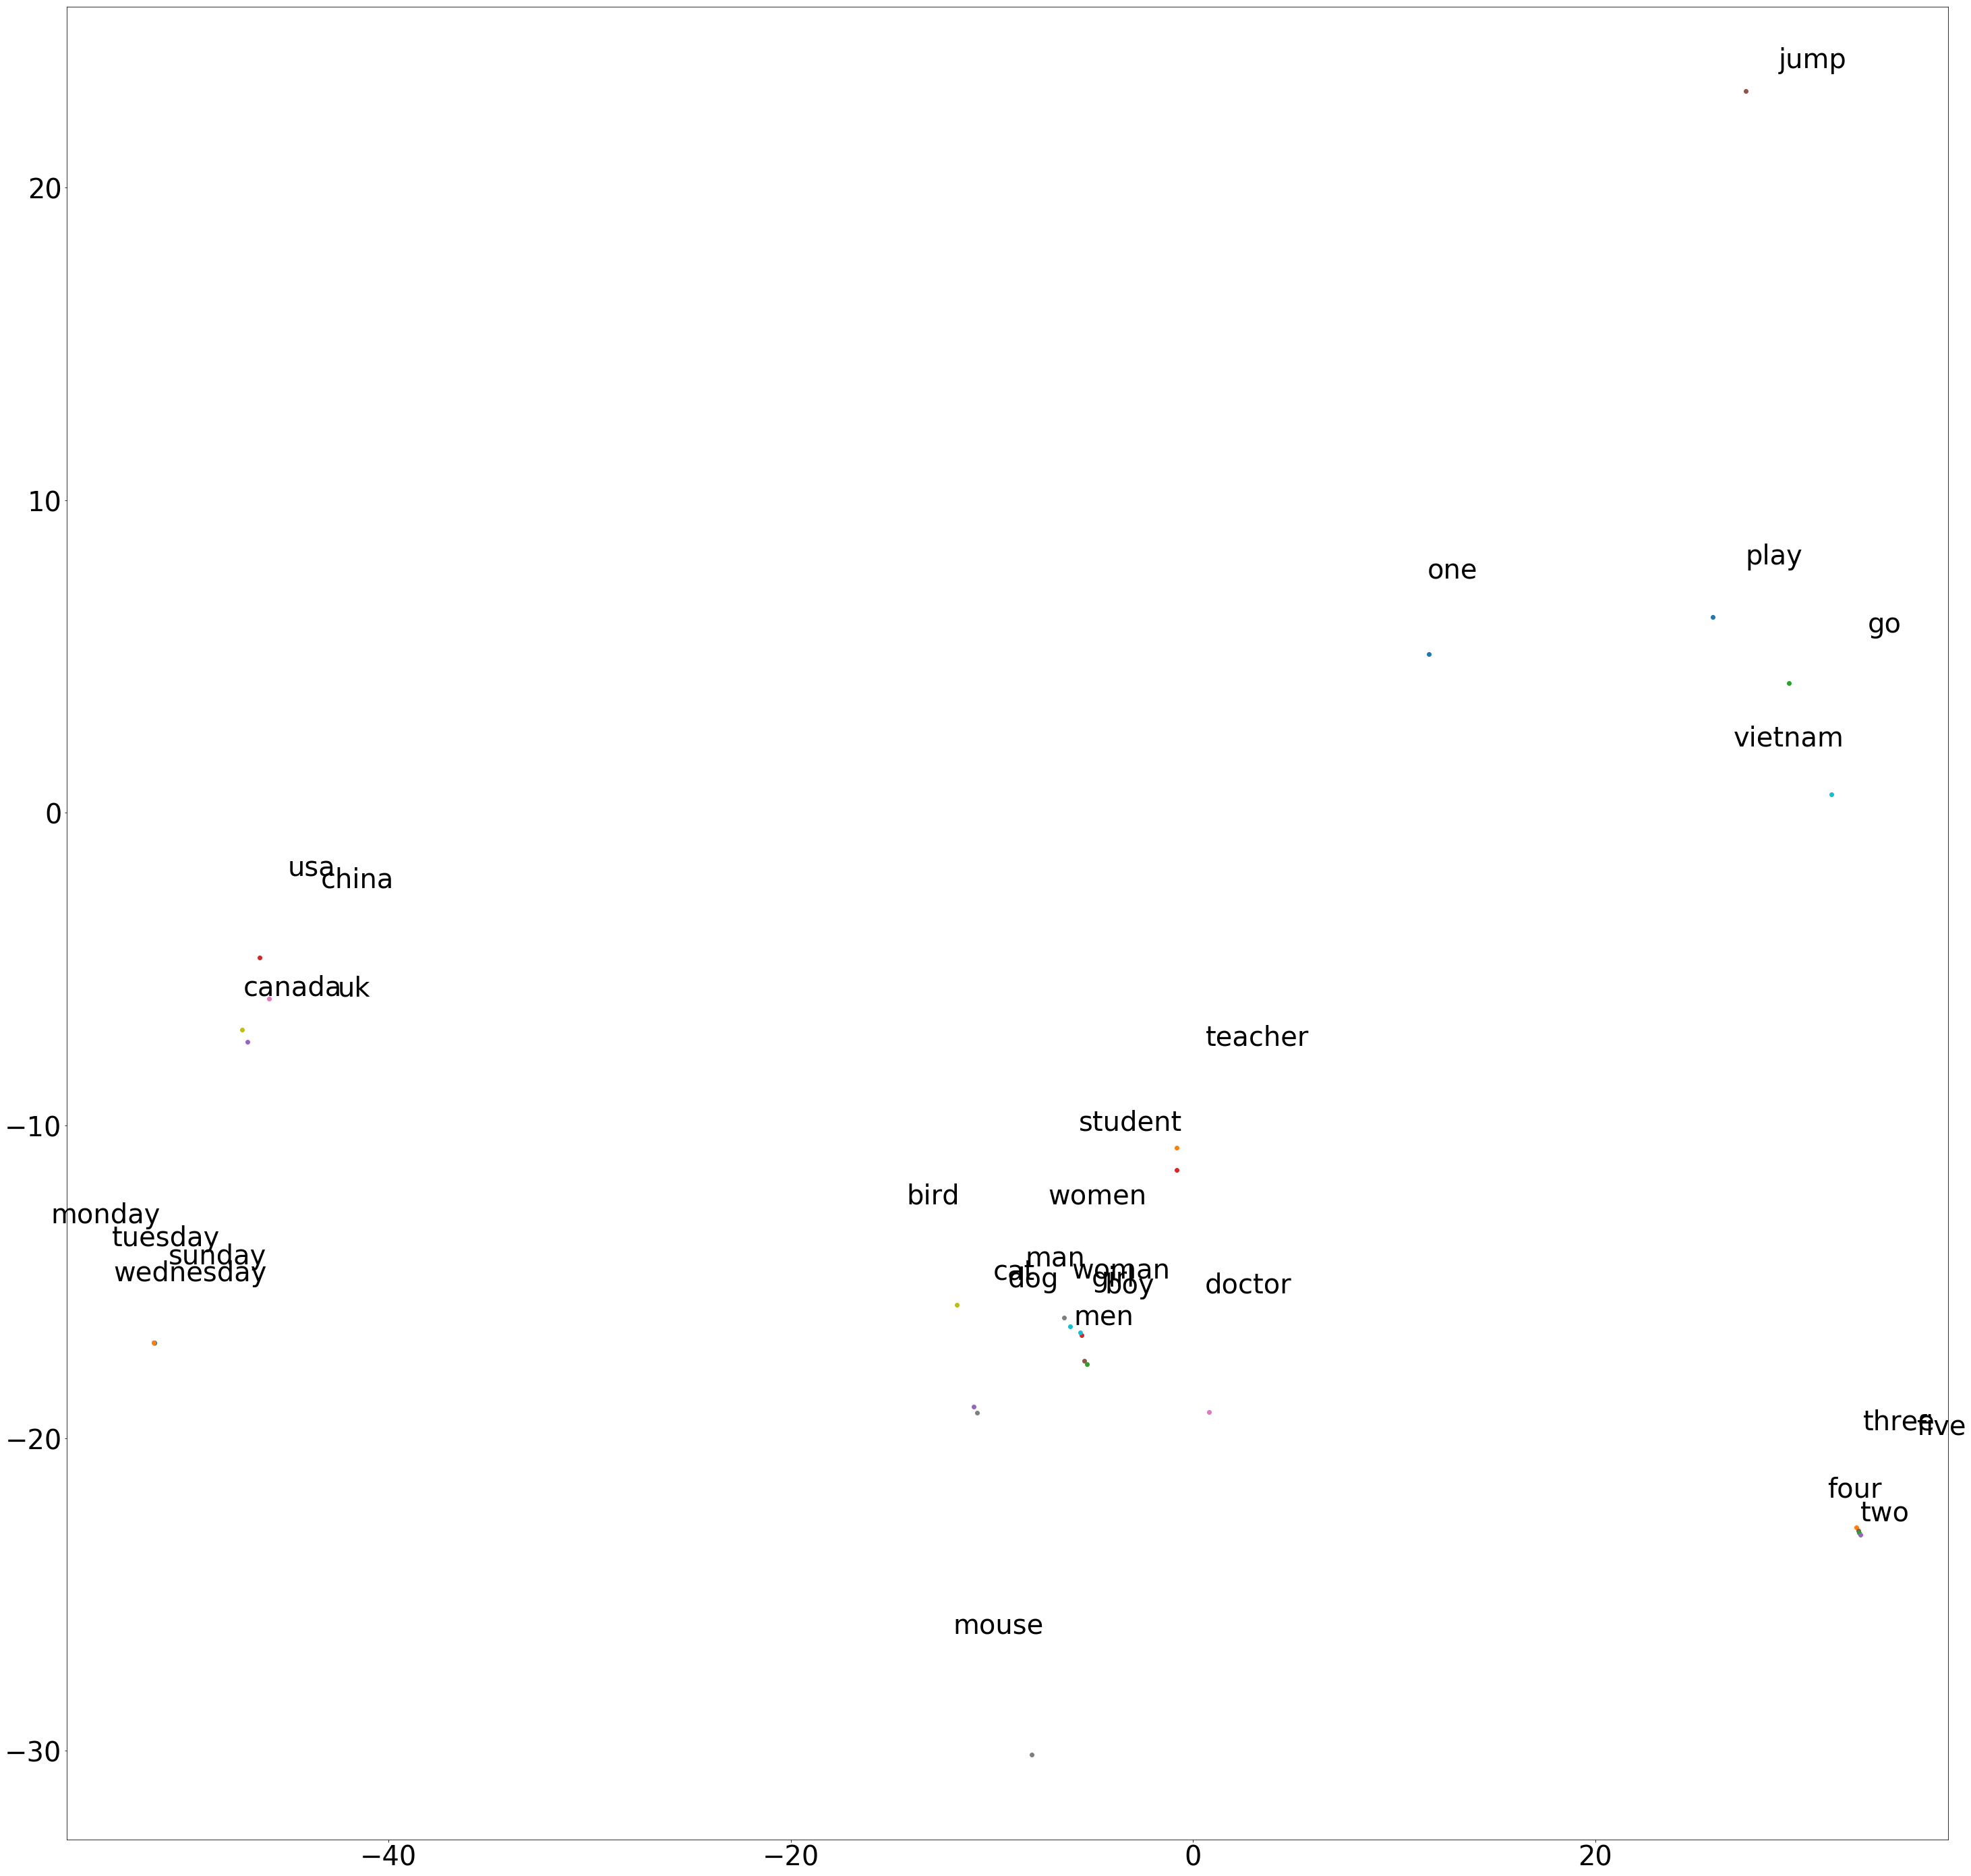

In [13]:
%matplotlib inline
from matplotlib import pylab, rcParams
import random

def plot(embeddings, labels, drawn_vocabs):
    """
        Sử dụng thư viện matplotlib để biểu diễn từ lên mặt phẳng tọa độ
    """
    pylab.figure(figsize=(50,50)) 
    rcParams.update({'font.size': 40}) 
    for i, label in enumerate(labels):
        if label in drawn_vocabs:
            x, y = embeddings[i,:]
            pylab.scatter(x, y)
            xt = random.randint(0,200)
            yt = random.randint(0,200)
            pylab.annotate(label, xy=(x, y), xytext=(xt, yt), textcoords='offset points',
                       ha='right', va='bottom')
    pylab.show()
    
en_drawn_vocabs = ["cat", "dog", "bird", "mouse",
                "woman", "man", "women", "men", "girl", "boy",
                "student", "teacher", "doctor",
                "one", "two", "three", "four", "five",
                "play", "jump", "go",
                "monday", "tuesday", "wednesday", "sunday",
                "usa", "uk", "canada", "china", "vietnam"]
plot(en_vector_2D, en_vocabs, en_drawn_vocabs)

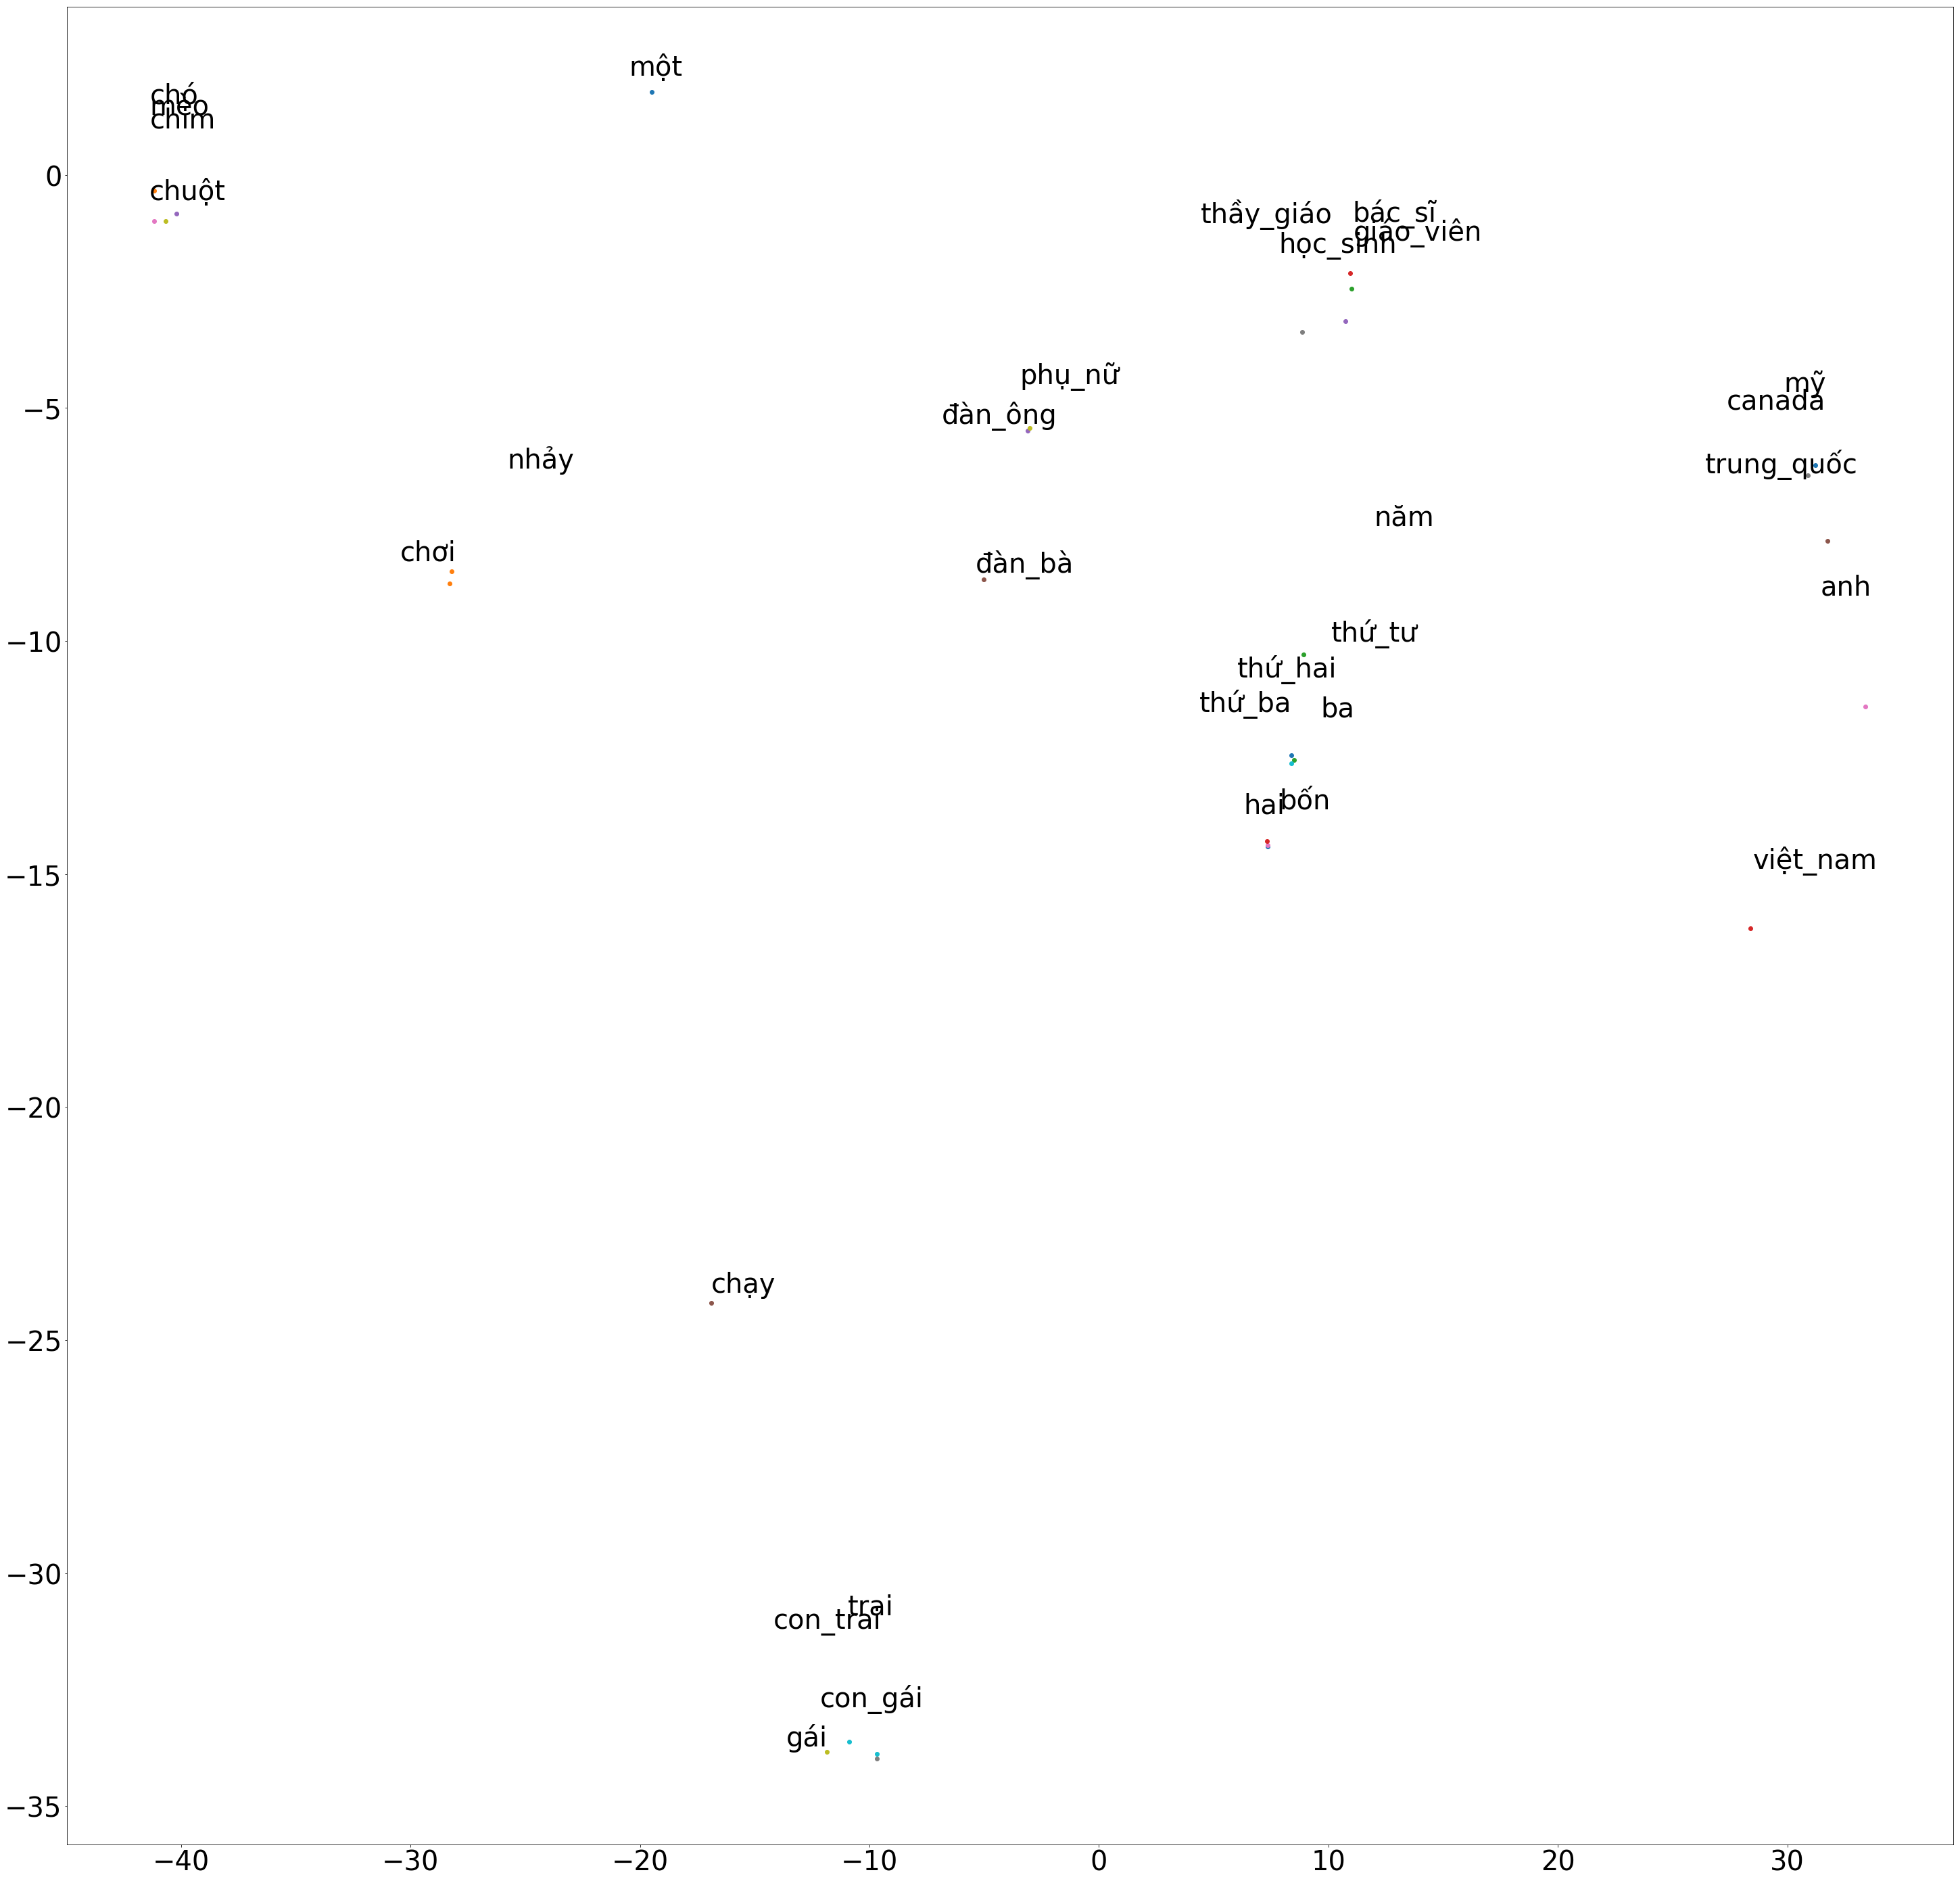

In [14]:
vi_drawn_vocabs = ["mèo", "chó", "chim", "chuột",
                "phụ_nữ", "đàn_ông", "đàn_bà", "trai", "con_trai", "gái", "con_gái",
                "học_sinh", "giáo_viên", "thầy_giáo", "cô_giáo", "bác_sĩ",
                "một", "hai", "ba", "bốn", "năm",
                "chơi", "nhảy", "chạy",
                "thứ_hai", "thứ_ba", "thứ_tư", "thứ_năm",
                "mỹ", "anh", "canada", "trung_quốc", "việt_nam"]
plot(vi_vector_2D, vi_vocabs, vi_drawn_vocabs)

## 3. Sử dụng Pretrained Word Embedding

Pretrained Word Embedding được biểu diễn như một ma trận trọng số (W) trong Neural Network.

In [33]:
import numpy as np
def create_embedding_matrix(word_vectors):
    """
        Chuyển KeyedVectors về ma trận embedding
        và từ điển chứa các cặp word - index

        @param      word_vectors        Dữ liệu word embedding lưu dưới định dạng KeyedVectors
        @return     embedding_matrix    ma trận word embedding với shape = (num_words,embedding_dim)
                    word2index          từ điển chứa cặp word - index
                    num_words           kích thước tập từ vựng
                    embedding_dim       số chiều vector embedding
                    
    """

    # --------------- TODO ---------------------------
    embedding_dim = word_vectors.vector_size
    num_words = len(word_vectors.vocab)

    embedding_matrix = []
    word2index = {}
    for token_index, token in enumerate(word_vectors.index2word):
        word2index[token] = token_index
        embedding_matrix.append(word_vectors.get_vector(token))
    # ------------------------------------------------

    return embedding_matrix, word2index, num_words, embedding_dim

In [34]:
# Ma trận embedding được sử dụng để chuyển đổi các từ thành vector
embedding_matrix, word2index, num_words, embedding_dim = create_embedding_matrix(en_vectors)

In [39]:
import nltk
def to_index(sentence, word2index):
    """
        Chuyển câu thành index vector
        @param      sentence       câu
        @param      word2index     từ điển chứa cặp word - index

        e.g: "hello world" => [0, 1]
    """

    sentence = nltk.word_tokenize(sentence)
    index_vector = []
    # --------------- TODO ---------------------------

    for word in sentence:
        index_vector.append(word2index[word])

    # ------------------------------------------------

    return index_vector

def to_embedding_vectors(sentence, word2index, embedding_matrix):
    """
        Chuyển câu thành ma trận của các embedding vector
        @param      sentence       câu
        @param      word2index     từ điển chứa cặp word - index

        e.g: "hello world" => [0, 1] => [[00..00], [00..01]]
    """

    # --------------- TODO ---------------------------
    
    sentence = nltk.word_tokenize(sentence)
    
    embedding_vectors = []
    for word in sentence:
        embedding_vectors.append(embedding_matrix[word2index[word]])

    # ------------------------------------------------

    return embedding_vectors


In [40]:
sentence = "this is an example"
index_vector = to_index(sentence, word2index)
embedding_vector = to_embedding_vectors(sentence, word2index, embedding_matrix)
print (embedding_vector)

[array([-3.800e-02, -3.830e-02, -3.040e-02, -5.330e-02, -5.900e-03,
       -8.110e-02, -2.060e-02, -2.090e-02,  8.540e-02, -2.320e-02,
        2.520e-02,  8.680e-02,  4.740e-02,  1.500e-03, -7.000e-04,
       -2.690e-02,  5.600e-03, -7.760e-02,  9.890e-02, -4.890e-02,
       -2.890e-02, -1.730e-02,  1.420e-02,  5.070e-02, -7.410e-02,
       -1.157e-01,  2.150e-02, -9.480e-02,  3.800e-02, -2.490e-02,
        4.190e-02, -1.020e-02,  5.600e-02, -7.000e-04,  5.440e-02,
        1.540e-02, -3.370e-02, -3.520e-02,  3.590e-02, -3.120e-02,
       -3.470e-02, -7.700e-03,  1.004e-01, -6.940e-02, -1.990e-02,
        3.800e-02, -5.380e-02,  2.190e-02,  6.200e-03, -5.000e-03,
        1.450e-02, -7.680e-02, -6.921e-01,  3.440e-02, -7.000e-04,
       -1.210e-02,  8.700e-03, -2.090e-01, -9.800e-02, -7.500e-02,
        3.810e-02,  5.610e-02,  2.590e-02,  3.300e-02, -1.425e-01,
       -3.920e-02,  1.830e-02, -2.580e-02, -1.220e-02,  3.300e-02,
       -2.130e-02,  4.700e-03,  2.540e-02, -8.150e-02,  3.550

Để sử dụng Word Embedding trên Tensorflow, tham khảo <a href = "https://www.tensorflow.org/api_docs/python/tf/nn/embedding_lookup" > Embedding Lookup </a>